In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Read data from mesa data: 
a = pd.read_excel("ONe6040_helm_update.xlsx")

# Read data after the initial module
f = open("ECSN-ONe6040-final.hse.5120","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')

for i in range(len(data2d)-1,-1,-1):
    if len(data2d[i]) == 3:
        aaaaa = data2d[i].copy()
        data2d.pop(i)
        i+=1
    else:
        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f20','he4','al27','si28','s32','p31','h1']
df.head()

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,19531.25,8.348564e+09,6.565876e+08,7.367386e+27,0.007297,0.599995,0.392705,1.000000e-20,2.021179e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
1,58593.75,8.348533e+09,6.566048e+08,7.367356e+27,0.007300,0.599995,0.392702,1.000000e-20,2.021830e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
2,97656.25,8.348472e+09,6.566394e+08,7.367297e+27,0.007305,0.599995,0.392697,1.000000e-20,2.023131e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
3,136718.75,8.348380e+09,6.566912e+08,7.367207e+27,0.007312,0.599995,0.392690,1.000000e-20,2.025084e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
4,175781.25,8.348258e+09,6.567602e+08,7.367089e+27,0.007323,0.599995,0.392679,1.000000e-20,2.027690e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20


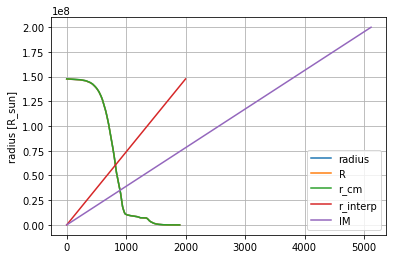

In [2]:
r_sun = 6.955e10  # cm
m_sun = 1.989e33  # gram
radius = np.array(a["radius"])
R = np.power(10,np.array(a["logR"]))
r_cm = np.array(a["radius_cm"])

r_interp = np.linspace(radius[-1], radius[0], 2000)

plt.plot(radius*r_sun, label='radius')
plt.plot(R*r_sun, label='R')
plt.plot(r_cm, label='r_cm')
plt.plot(r_interp*r_sun, label='r_interp')


plt.plot(np.array(df['radius']), label='IM')


plt.legend()
plt.xlabel("")
plt.ylabel("radius [R_sun]")
plt.grid()
plt.show()

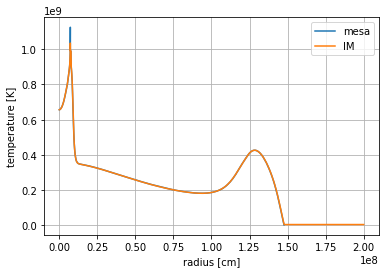

In [3]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.plot(radius*r_sun,temp,label='mesa')
#plt.plot(R*r_sun,T,":")
#plt.plot(r_interp*r_sun,T_interp)

plt.plot(np.array(df['radius']),np.array(df['temperature']),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

#plt.xlim(0,1000000)


plt.grid()
plt.legend()
plt.show()

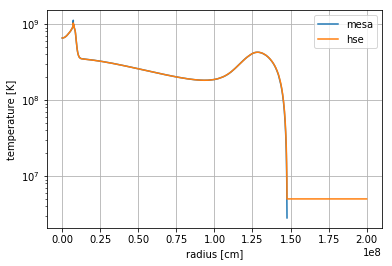

In [4]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.semilogy(radius*r_sun,temp,label='mesa')
#plt.semilogy(R*r_sun,T,":")
#plt.semilogy(r_interp,T_interp)

plt.semilogy(np.array(df['radius']),np.array(df['temperature']),label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("temp_initial model")

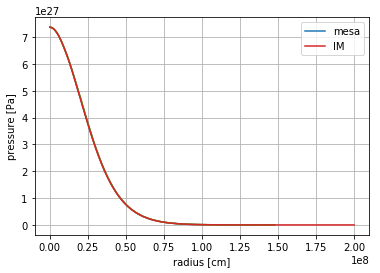

In [5]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.plot(R*r_sun,pressure,label='mesa')
plt.plot(R*r_sun,P)
plt.plot(r_interp*r_sun,p_interp)

plt.plot(np.array(df['radius']),np.array(df['pressure']),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")

#plt.xlim(0,1000000)
#plt.ylim(7e27,9e27)
plt.legend()
plt.grid()
#plt.show()
#plt.savefig("pressure_initial_model")

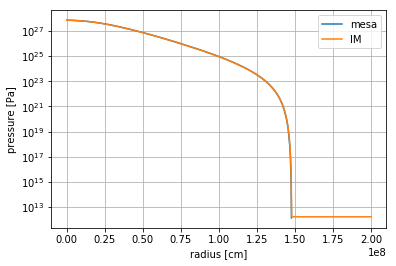

In [6]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.semilogy(R*r_sun,pressure,label='mesa')
#plt.semilogy(R*r_sun,P)
#plt.semilogy(r_interp*r_sun,p_interp)

plt.semilogy(np.array(df['radius']),np.array(df['pressure']),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
plt.legend()
#plt.ylim(5e20,2e28)
plt.grid()
plt.show()

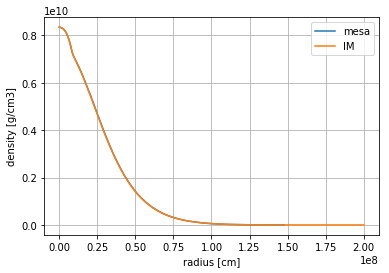

In [7]:
rho = np.power(10,np.array(a["logRho"]))

plt.plot(radius*r_sun,rho,label='mesa')

plt.plot(np.array(df['radius']),np.array(df['density']),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.legend()
plt.grid()
plt.show()

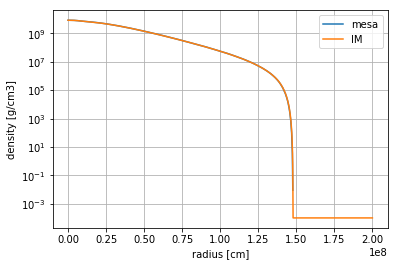

In [8]:
plt.semilogy(radius*r_sun,rho,label='mesa')

plt.semilogy(np.array(df['radius']),np.array(df['density']),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.grid()
plt.legend()
plt.show()

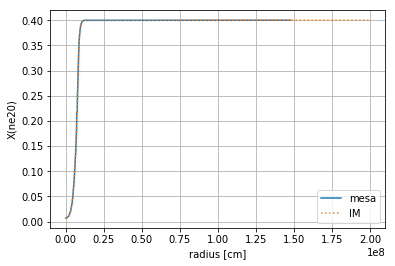

In [9]:
element = 'ne20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

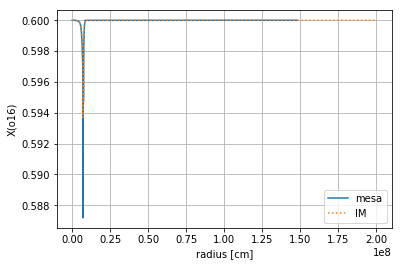

In [10]:
element = 'o16'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

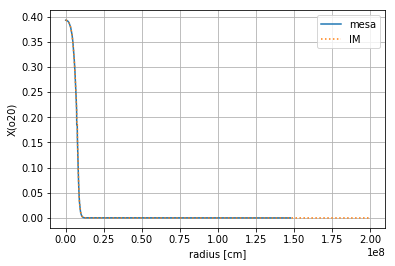

In [11]:
element = 'o20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

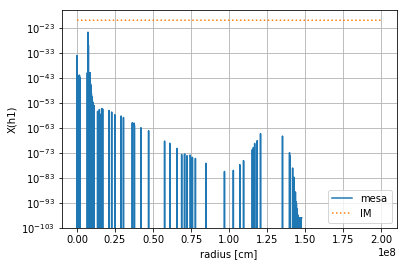

In [12]:
element = 'h1'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

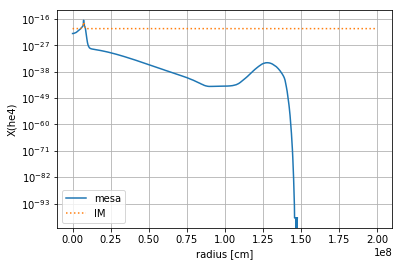

In [13]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

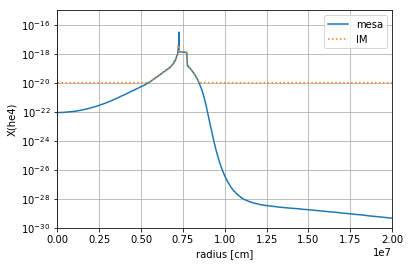

In [14]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.xlim(0,0.2e8)
plt.ylim(1e-30,1e-15)
plt.show()

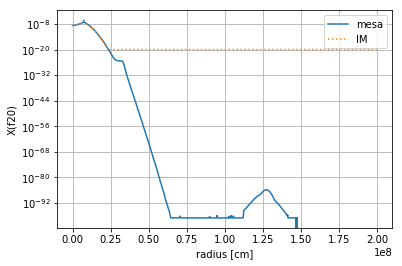

In [15]:
element = 'f20'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

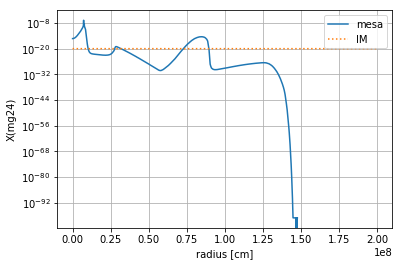

In [16]:
element = 'mg24'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

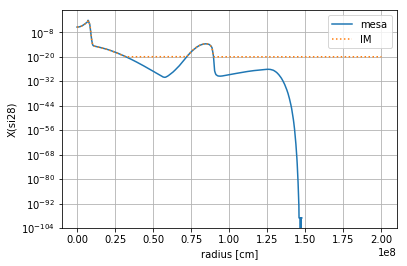

In [17]:
element = 'si28'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

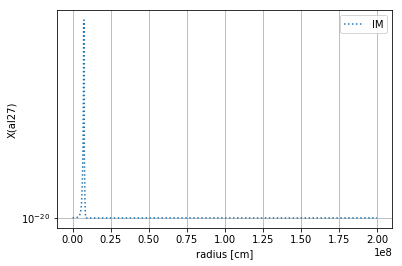

In [18]:
element = 'al27'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

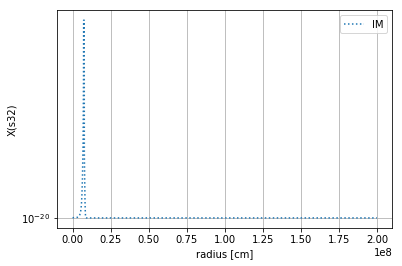

In [19]:
element = 's32'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

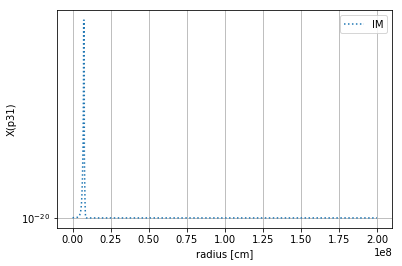

In [20]:
element = 'p31'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

In [21]:
df.head()

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,19531.25,8.348564e+09,6.565876e+08,7.367386e+27,0.007297,0.599995,0.392705,1.000000e-20,2.021179e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
1,58593.75,8.348533e+09,6.566048e+08,7.367356e+27,0.007300,0.599995,0.392702,1.000000e-20,2.021830e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
2,97656.25,8.348472e+09,6.566394e+08,7.367297e+27,0.007305,0.599995,0.392697,1.000000e-20,2.023131e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
3,136718.75,8.348380e+09,6.566912e+08,7.367207e+27,0.007312,0.599995,0.392690,1.000000e-20,2.025084e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
4,175781.25,8.348258e+09,6.567602e+08,7.367089e+27,0.007323,0.599995,0.392679,1.000000e-20,2.027690e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
